In [10]:
from uavsar_pytools import UavsarCollection
import pandas as pd

In [3]:
c = UavsarCollection(collection = 'Grand Mesa, CO', work_dir = '~/')

In [6]:
c.find_urls()

INFO:uavsar_pytools.uavsar_collection:Found 47 image pairs


In [23]:
df = pd.DataFrame()
for r in c.results:
    print(r.properties)
    s = pd.to_datetime(r.properties['startTime'])
    e = pd.to_datetime(r.properties['stopTime'])
    if s > pd.to_datetime('2019-12-01').tz_localize('UTC'):
        df = df.append({'flight1':s, 'flight2':e}, ignore_index= True)

{'beamModeType': 'RPI', 'browse': ['https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090HH_01.cor.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090HH_01.hgt.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090HV_01.cor.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090HV_01.hgt.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090VH_01.cor.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090VH_01.hgt.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.cor.png', 'https://datapool.asf.alaska.edu/BROWSE/UA/grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.hgt.png'], 'bytes': '1112873332', 'centerLat': '39.0545480565216', 'centerLon': '-108.110831843488', 'faradayRotation': None, '

/tmp/ipykernel_24044/955646468.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'flight1':s, 'flight2':e}, ignore_index= True)
/tmp/ipykernel_24044/955646468.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'flight1':s, 'flight2':e}, ignore_index= True)
/tmp/ipykernel_24044/955646468.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'flight1':s, 'flight2':e}, ignore_index= True)
/tmp/ipykernel_24044/955646468.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'flight1':s, 'flight2':e}, ignore_index= True)
/tmp/ipykernel_24044/955646468.py:7: FutureWarning: The fram

In [28]:
df.sort_values(by = 'flight1').reset_index(drop=True)

,flight1,flight2
0,2020-02-01 02:13:16+00:00,2020-03-12 18:17:08+00:00
1,2020-02-01 02:13:16+00:00,2020-02-26 17:40:54+00:00
2,2020-02-01 02:13:16+00:00,2020-02-19 17:24:18+00:00
3,2020-02-01 02:13:16+00:00,2020-02-12 16:47:20+00:00
4,2020-02-12 16:47:07+00:00,2020-02-19 17:24:04+00:00
5,2020-02-19 17:24:03+00:00,2020-02-26 17:40:39+00:00
6,2020-02-26 17:40:39+00:00,2020-03-12 18:16:50+00:00
7,2021-01-27 19:47:02+00:00,2021-02-03 23:50:19+00:00
8,2021-02-03 23:50:36+00:00,2021-02-10 19:12:27+00:00
9,2021-02-10 19:12:13+00:00,2021-03-03 22:03:01+00:00


In [31]:
df.to_csv('gm_uavsar_flightdates.csv')

Map of snowpit locations

In [2]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import our class for the points table
from snowexsql.data import PointData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

In [3]:
# Pick a dataset
dataset = 'depth'

# Pick a date
collection_date = date(2020, 2, 7)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(PointData)

# We then want to filter by the selected the data type depth.
qry = qry.filter(PointData.type == 'depth')

# Filter by a date
qry = qry.filter(PointData.date == collection_date)

# Limit it to a couple thousand 
qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

304 records returned!


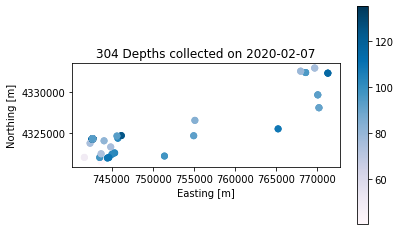

In [4]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='PuBu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(df.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')

# Close the session to avoid hanging transactions
session.close()